In [3]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [148]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [149]:
# Calculate the mean number of housing units per year (hint: use groupby) 
total_housing_units = sfo_data["housing_units"]
housing_units = total_housing_units.groupby("year").mean().sort_values()

housing_units.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [150]:
file_path = Path("sfo_census_data.csv")
sfo_neighborhood = pd.read_csv(file_path)
sfo_neighborhood.head()


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [151]:
sfo_data_df = pd.DataFrame(sfo_data,
                  columns =['neighborhood', 'sale_price_sqr_foot', 
                  'gross_rent'])
  
# Set 'Name' column as index 
# on a Dataframe
sfo_data_df.set_index("sale_price_sqr_foot", inplace = True)
  
# Using the operator .loc[] to
# select all the rows with 
# some particular columns
hood = sfo_data_df.loc[:, ["gross_rent"]]

In [152]:
sfo_neighborhood_prices = pd.DataFrame(sfo_data, columns=['sale_price_sqr_foot', 'gross_rent'])
sfo_neighborhood_prices= sfo_neighborhood_prices.groupby("year").mean()
sfo_neighborehood_prices.head(10)

,neighborhood,sale_price_sqr_foot,gross_rent
year,,,
2010,Alamo Square,291.182945,1239
2010,Anza Vista,267.932583,1239
2010,Bayview,170.098665,1239
2010,Buena Vista Park,347.394919,1239
2010,Central Richmond,319.027623,1239
2010,Central Sunset,418.172493,1239
2010,Corona Heights,369.359338,1239
2010,Cow Hollow,569.379968,1239
2010,Croker Amazon,165.645730,1239


In [273]:
sfo_new_data = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_new_data.reset_index(inplace=True)
sfo_new_data.rename(columns={"level_0": "year"}, inplace=True)
sfo_new_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [275]:
average_price_by_neighborhood_plot = sfo_new_data.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)

In [262]:
expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False)
expensive_neighborhoods = expensive_neighborhoods.reset_index()
expensive_neighborhoods = expensive_neighborhoods.head(10)
expensive_neighborhoods.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


In [264]:
expensive_neighborhoods_year = sfo_data[sfo_data["neighborhood"].isin(expensive_neighborhoods["neighborhood"])]
expensive_neighborhoods_year = expensive_neighborhoods_year.reset_index()
expensive_neighborhoods_year = expensive_neighborhoods_year
expensive_neighborhoods_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Cow Hollow,569.379968,372560,1239
1,2010,Miraloma Park,680.608729,372560,1239
2,2010,Pacific Heights,496.516014,372560,1239
3,2010,Potrero Hill,491.450004,372560,1239
4,2010,Presidio Heights,549.417931,372560,1239


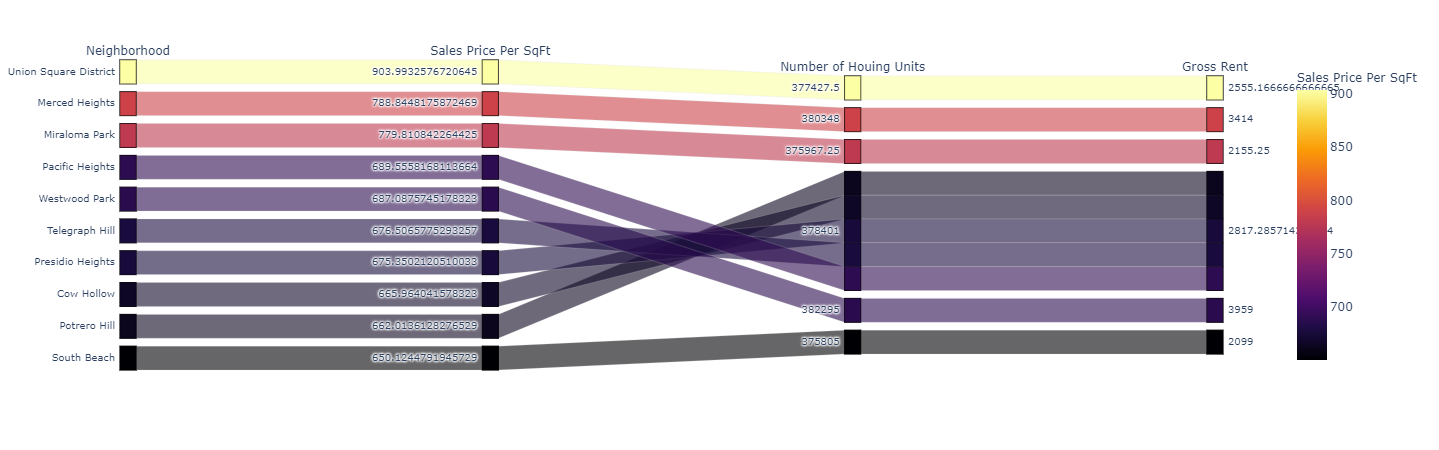

In [266]:
parallel_categories_plot = px.parallel_categories(
    expensive_neighborhoods,
    dimensions = ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sales Price Per SqFt",
        "housing_units": "Number of Houing Units",
        "gross_rent": "Gross Rent"})

parallel_categories_plot

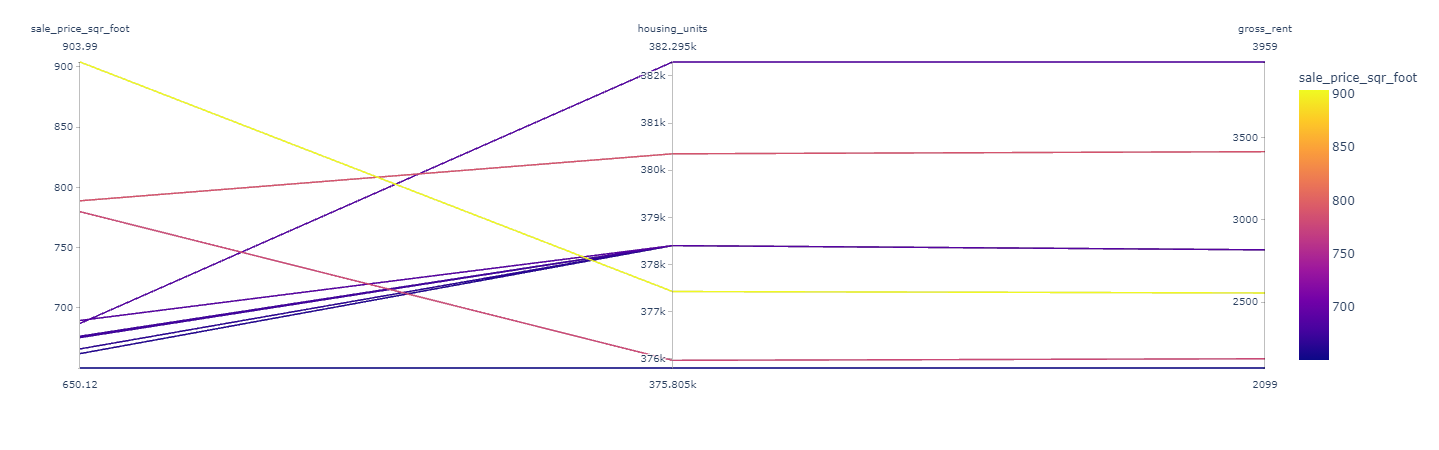

In [267]:
parallel_coordinates_plot = px.parallel_coordinates(expensive_neighborhoods, color='sale_price_sqr_foot')

parallel_coordinates_plot

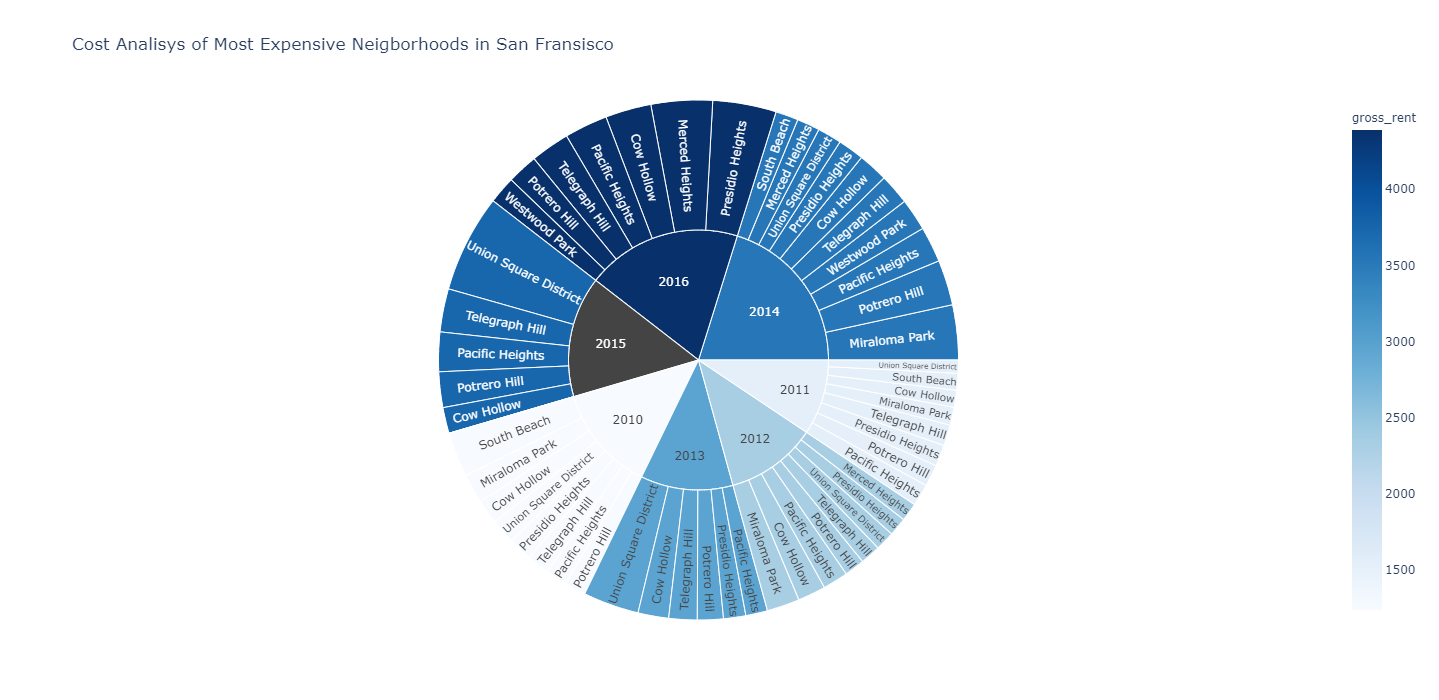

In [272]:
sunburst_plot = px.sunburst(
    expensive_neighborhoods_year,
    path=['year', 'neighborhood'],
    title='Cost Analisys of Most Expensive Neigborhoods in San Fransisco',
    values='sale_price_sqr_foot',
    color='gross_rent',
    hover_data=['neighborhood'],
    height=700,
    width=700,
    color_continuous_scale='blues',
    color_continuous_midpoint=np.average(expensive_neighborhoods_year['gross_rent'],
    weights=expensive_neighborhoods_year['sale_price_sqr_foot']))

sunburst_plot

In [153]:
sfo_neighborhood_prices.hvplot.bar(staked=False, rot=45)

:Bars   [year,Variable]   (value)

In [214]:
# Load neighborhoods coordinates data
# Read the Mapbox API key
load_dotenv('sample.env')
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

# Read in data
sfo_map = pd.read_csv(Path("sfo_neighborhoods_coordinates.csv"))

sfo_map.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [215]:
sfo_map

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


In [216]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [217]:
average_prices_by_neighborhood = sfo_data[["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"]]
average_prices_by_neighborhood = average_prices_by_neighborhood.groupby("neighborhood").mean()

average_prices_by_neighborhood.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [187]:
sfo_area = pd.read_csv("sfo_census_data.csv").drop_duplicates()
sfo_area

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [219]:
sfo_coordinates = pd.read_csv("sfo_neighborhoods_coordinates.csv").drop_duplicates()
sfo_coordinates

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


In [220]:
area_with_index = sfo_area.set_index("neighborhood")
coordinates_with_index = sfo_coordinates.set_index("Neighborhood")


In [221]:
area_with_index.drop(columns=['housing_units'], inplace=True)
area_with_index

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,291.182945,1239
Anza Vista,267.932583,1239
Bayview,170.098665,1239
Buena Vista Park,347.394919,1239
Central Richmond,319.027623,1239
Central Sunset,418.172493,1239
Corona Heights,369.359338,1239
Cow Hollow,569.379968,1239
Croker Amazon,165.645730,1239


In [222]:
coordiantes_with_index

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


In [224]:
area_with_index= area_with_index.groupby("neighborhood").mean()
area_with_index

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,366.020712,2817.285714
Anza Vista,373.382198,3031.833333
Bayview,204.588623,2318.400000
Bayview Heights,590.792839,3739.000000
Bernal Heights,576.746488,3080.333333
Buena Vista Park,452.680591,2698.833333
Central Richmond,394.422399,2817.285714
Central Sunset,423.687928,2817.285714
Clarendon Heights,487.244886,2250.500000


In [225]:
area_with_index.head()

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,366.020712,2817.285714
Anza Vista,373.382198,3031.833333
Bayview,204.588623,2318.400000
Bayview Heights,590.792839,3739.000000
Bernal Heights,576.746488,3080.333333


In [254]:
sfo_sales_map = (
    pd.concat([area_with_index, coordinates_with_index], axis=1, sort_valaues(gross_rent)
    .dropna()
    .reset_index()
)
sfo_sales_map.he

SyntaxError: invalid syntax (<ipython-input-254-629f5b0b82a1>, line 6)

In [245]:
# Create plots
def get_sfo_sales_plot():
    sfo_sales_plot = px.scatter_mapbox(
        sfo_sales_map,
        lat="latitude",
        lon="longitude",
        size="gross_rent",
        color="index",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="SFO Sales Map",
        zoom=3,
        width=1000,
    )
    return sfo_sales_plot



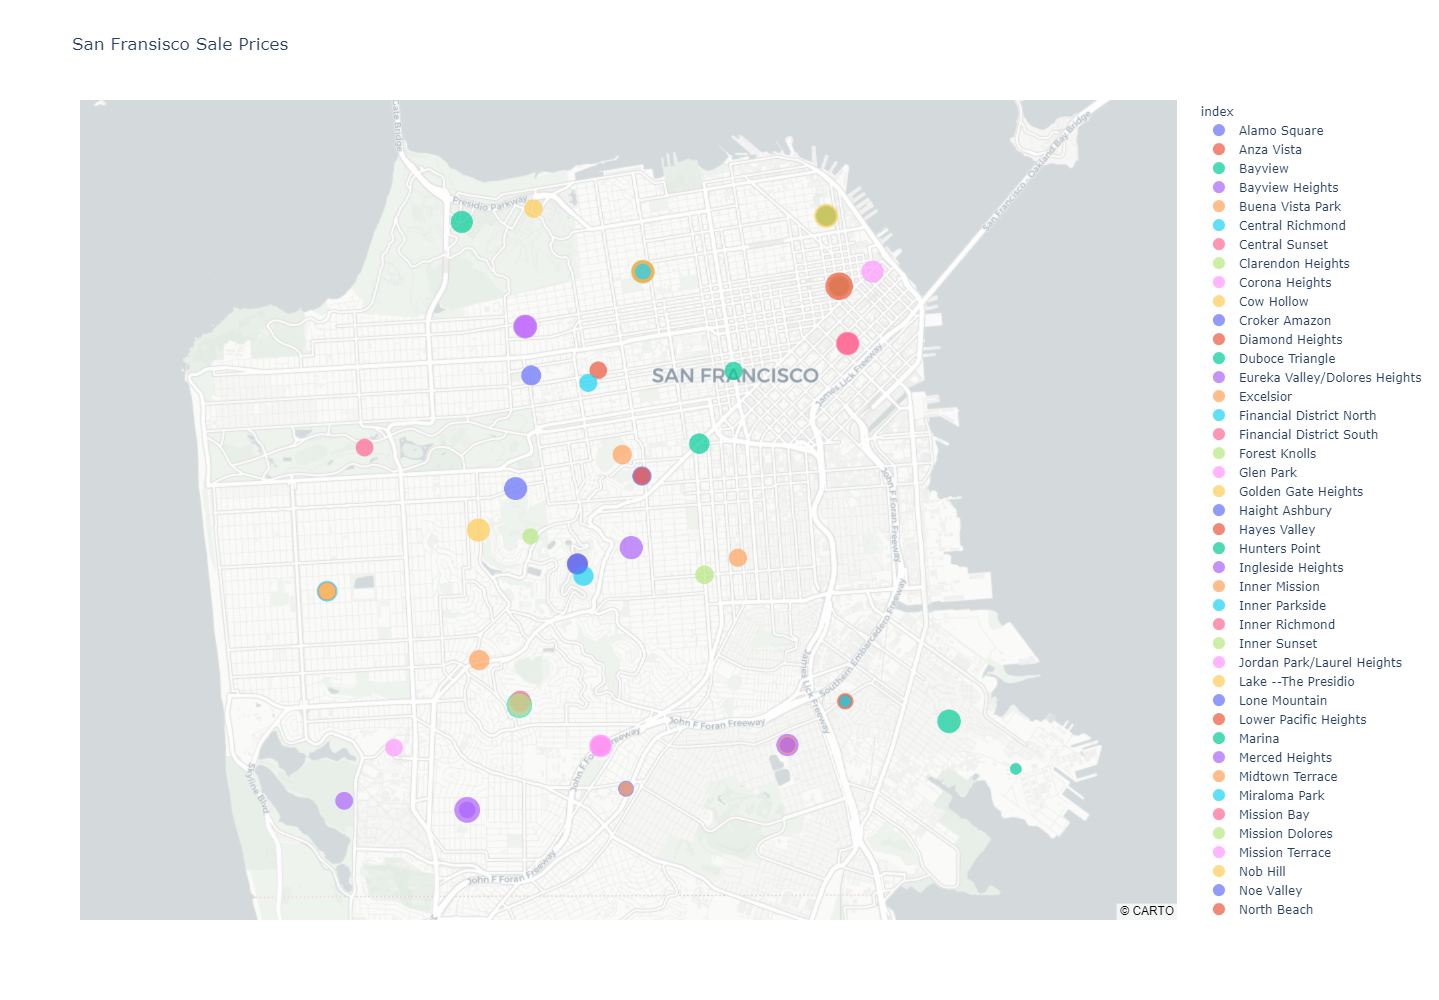

In [253]:
map_1 = px.scatter_mapbox(
    sfo_sales_map,
    lat="Lat",
    lon="Lon",
    color="index",
    text=None,
    hover_name="index",
    hover_data=None,
    custom_data=None,
    size="sale_price_sqr_foot",
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels="gross_rent",
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    size_max=None,
    zoom=12,
    center=None,
    mapbox_style="carto-positron",
    title="San Fransisco Sale Prices",
    template=None,
    width=1000,
    height=1000,
)
map_1.show()

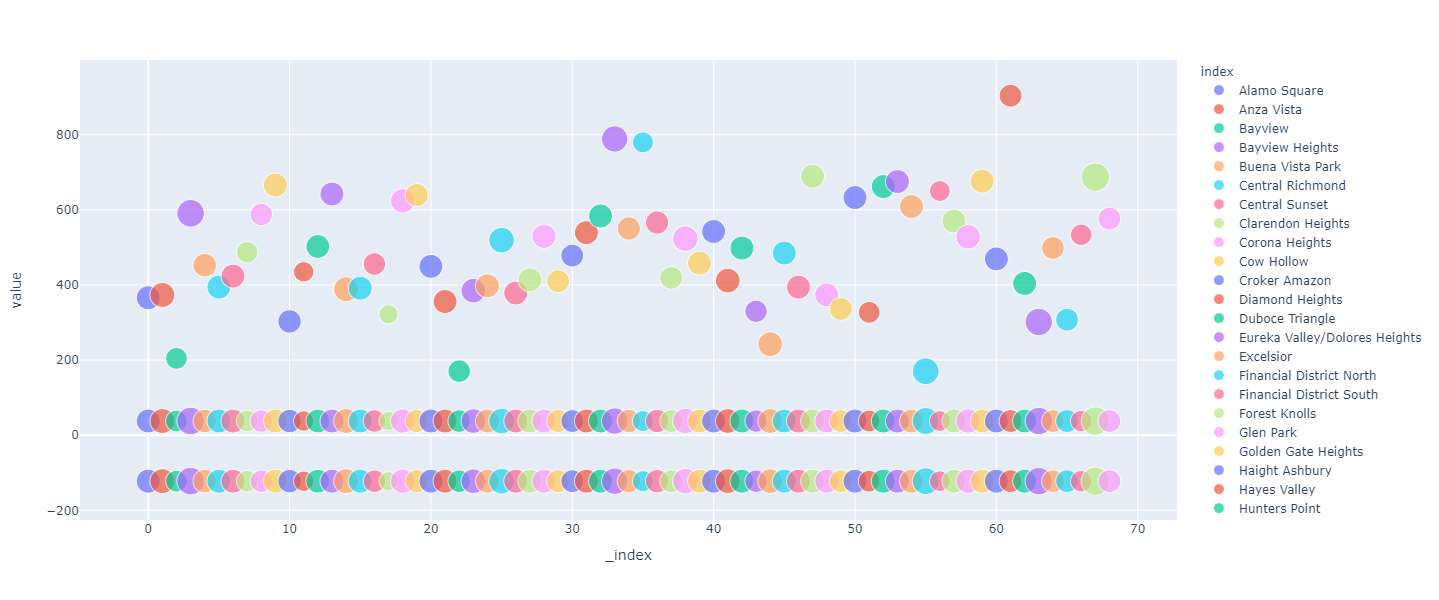

In [229]:
px.scatter(
    sfo_sales_map,
    size="gross_rent",
    color="index", width= 1000, height= 600
)

In [77]:
df_lambda = sfo_data['gross_rent'].loc[lambda x: x >0]
df_lambda = df_lambda.groupby("year").mean()
df_lambda

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [78]:
df_lambda.hvplot()

:Curve   [year]   (gross_rent)

In [79]:
df_lambda1 = sfo_data['sale_price_sqr_foot'].loc[lambda x: x >0]
df_lambda1 = df_lambda1.groupby("year").mean()
df_lambda1

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [80]:
df_lambda1.hvplot(line_color = "red")

:Curve   [year]   (sale_price_sqr_foot)

In [13]:
df_lambda2 = sfo_data['gross_rent'].loc[lambda x: x >0]
df_lambda2 = df_lambda2.groupby("year").max()
df_lambda2

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [14]:
df_lambda2.hvplot(line_color = "green")

:Curve   [year]   (gross_rent)

In [42]:
file_path = Path("sfo_census_data.csv")
sfo_data1 = pd.read_csv(file_path)
sfo_data1.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [44]:
neighborhood = pd.DataFrame(sfo_data1, columns = ['neighborhood'],dtype=str)
neighborhood.head()

,neighborhood
0,Alamo Square
1,Anza Vista
2,Bayview
3,Buena Vista Park
4,Central Richmond


In [45]:
list_neighborhood = pd.DataFrame(sfo_data1, columns = ['neighborhood'],dtype=str)
list_neighborhood.head()

,neighborhood
0,Alamo Square
1,Anza Vista
2,Bayview
3,Buena Vista Park
4,Central Richmond


In [228]:
#list_of_neighborhood
#list_of_neighborhood

,neighborhood
0,Alamo Square
1,Anza Vista
2,Bayview
3,Buena Vista Park
4,Central Richmond
5,Central Sunset
6,Corona Heights
7,Cow Hollow
8,Croker Amazon
9,Diamond Heights


In [28]:
list_neighborhood.head()

,neighborhood
0,Alamo Square
1,Anza Vista
2,Bayview
3,Buena Vista Park
4,Central Richmond


In [213]:
list_of_neighborhood = list_of_neighborhood

In [46]:
def neighborhood(x):
    return x

In [47]:
#list_of_neighborhood = ['neighborhood']
#list_of_neighborhood
interact(neighborhood, x = list_neighborhood) 

Column
    [0] Column
        [0] Select(name='x', options=['neighborhood'], value='neighborhood')
    [1] Row
        [0] Markdown(str, name='interactive02040')

In [33]:
def f(x):
    return x

In [49]:
interact(f, x= neighborhood)

ValueError: cannot find widget or abbreviation for argument: 'x'

In [26]:
#df2 = pd.DataFrame(df1, columns = ['neighborhood'],dtype=str)
#df2.head()
#average_sales_price_sqt = sfo_data["sale_price_sqr_foot"]
#average_sales_price_sqt = average_sales_price_sqt.groupby("year").mean()

#average_gross_rent = sfo_data["gross_rent"]
#average_gross_rent = average_gross_rent.groupby("year").mean()



,neighborhood
year,
2010,Alamo Square
2010,Anza Vista
2010,Bayview
2010,Buena Vista Park
2010,Central Richmond


In [9]:
#columns =['neighborhood','sale_price_sqr_foot', 'gross_rent']
#df1 = pd.DataFrame(df, columns=columns)

NameError: name 'df' is not defined

In [103]:
df1.head()

,neighborhood,sale_price_sqr_foot,gross_rent
0,Alamo Square,291.182945,1239
1,Anza Vista,267.932583,1239
2,Bayview,170.098665,1239
3,Buena Vista Park,347.394919,1239
4,Central Richmond,319.027623,1239


In [104]:
df1.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [86]:
df_hood = pd.DataFrame(df_hood, columns=columns)

NameError: name 'df_hood' is not defined

In [ ]:
df1 = pd.DataFrame(data_frame, columns=['Column A', 'Column B', 'Column C', 'Column D'])
df1

In [ ]:

average_sales_price_sqt = sfo_data["sale_price_sqr_foot"]
average_sales_price_sqt = average_sales_price_sqt.groupby("year").mean()

average_gross_rent = sfo_data["gross_rent"]
average_gross_rent = average_gross_rent.groupby("year").mean()

average_sales_price_sqt.head()


In [11]:
file_path = Path("sfo_census_data.csv")
sqr_foot_data = pd.read_csv(file_path)
sqr_foor_data.head()

NameError: name 'sqr_foor_data' is not defined

In [82]:


file_path = Path("sfo_census_data.csv")
df = pd.read_csv(file_path)


df1_mean = df.iloc[2].mean()
df2_mean = df.iloc[3].mean()
df3_mean = df.iloc[4].mean()




df.head()


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [68]:
# Save the dataframe as a csv file
hoausing_units.to_csv('housing_units.csv')

In [69]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units.hvplot.bar()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
housing_units.hvplot.bar(x ="year", y="housing_units").opts(yformatter = "%.0f")

:Bars   [year]   (housing_units)

In [34]:
sorted_data = total_housing_units.sort_values()
sorted_data.hvplot.bar()

:Bars   [year]   (housing_units)

In [70]:
housing_units.sort_values("housing_units").hvplot.bar()

ValueError: No axis named housing_units for object type <class 'type'>

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# construct some data like what you have:
y = housing_units
mins = y.min(0)
maxes = y.max(0)
means = y.mean(0)
std = y.std(0)

# create stacked errorbars:
housing_units.hvplot.bar().opts(yformatter="%.0f")

#plt.xlim(-1, 8)

:Bars   [year]   (housing_units)

In [10]:
y_pos = np.arange(housing_units)

df1_mean = housing_units.iloc[0].mean()
df1_std = housing_units.iloc[0].std()
df2_mean = housing_units.iloc[1].mean()
df2_std = df.iloc[1].std()
df3_mean = df.iloc[2].mean()
df3_std = df.iloc[2].std()
df4_mean = df.iloc[3].mean()
df4_std = df.iloc[3].std()

value = (df1_mean, df2_mean, df3_mean, df4_mean)
Std = (df1_std, df2_std, df3_std, df4_std)

plt.bar(y_pos, value, yerr=Std, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Stock price')
plt.title('Something')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
# Calculate the average sale price per square foot and average gross rent
average_sales_price_sqt = sfo_data["sale_price_sqr_foot"]
average_sales_price_sqt = average_sales_price_sqt.groupby("year").mean()

average_gross_rent = sfo_data["gross_rent"]
average_gross_rent = average_gross_rent.groupby("year").mean()

average_sales_price_sqt.head()


year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
Name: sale_price_sqr_foot, dtype: float64

In [12]:
average_gross_rent.head()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
Name: gross_rent, dtype: int64

In [18]:
average_housing_cost = pd.DataFrame(
    columns=("average_sale_price_sqt", "average_gross_rent")
)
average_housing_cost.head(10)

,average_sale_price_sqt,average_gross_rent


In [19]:
average_housing_cost = sfo_data[['sale_price_sqr_foot', 'gross_rent']]
average_housing_cost = average_housing_cost.groupby("year").mean()

average_housing_cost.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


In [15]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!


# Line chart for average montly rent
average_sales_price_sqt.hvplot.line() + average_gross_rent.hvplot.line()

:Layout
   .Curve.Sale_price_sqr_foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_rent          :Curve   [year]   (gross_rent)

In [98]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_prices_by_neighborhood = sfo_data[["neighborhood", "gross_rent"]]
average_prices_by_neighborhood = average_prices_by_neighborhood.groupby("neighborhood").mean().sort_values(by='gross_rent', ascending=False)

average_prices_by_neighborhood.head(10)



,gross_rent
neighborhood,
Westwood Park,3959.000000
Bayview Heights,3739.000000
Visitacion Valley,3657.000000
Silver Terrace,3528.000000
Merced Heights,3414.000000
Inner Parkside,3224.000000
Mission Terrace,3173.400000
Bernal Heights,3080.333333
Anza Vista,3031.833333


In [21]:
average_prices_by_neighborhood.hvplot.line(), rot=90

SyntaxError: can't assign to function call (<ipython-input-21-9146bd6fceef>, line 1)

In [65]:
area = sfo_data["neighborhood"]
area.head()

year
2010        Alamo Square
2010          Anza Vista
2010             Bayview
2010    Buena Vista Park
2010    Central Richmond
Name: neighborhood, dtype: object

In [67]:
# Define function to choose a Neighborhood
def choose_neighborhood(area):
    return area

In [63]:
column + neighborhood
df1_area = sfo_data.iloc[]
df1_area

SyntaxError: invalid syntax (<ipython-input-63-797ca104d560>, line 1)

In [68]:
neighborhood = sfo_data["neighborhood"]
neighborhood

year
2010                     Alamo Square
2010                       Anza Vista
2010                          Bayview
2010                 Buena Vista Park
2010                 Central Richmond
2010                   Central Sunset
2010                   Corona Heights
2010                       Cow Hollow
2010                    Croker Amazon
2010                  Diamond Heights
2010                        Downtown 
2010    Eureka Valley/Dolores Heights
2010                        Excelsior
2010         Financial District North
2010         Financial District South
2010                    Forest Knolls
2010                        Glen Park
2010              Golden Gate Heights
2010                   Haight Ashbury
2010                     Hayes Valley
2010                    Hunters Point
2010                       Ingleside 
2010                    Inner Mission
2010                   Inner Parkside
2010                   Inner Richmond
2010                     Inner Sunset
2010   

In [69]:
## normal situation call function choose_neighborhood

list_of_neighborhood = [neighborhood]
choose_neighborhood(list_of_neighborhood)

[year
 2010                     Alamo Square
 2010                       Anza Vista
 2010                          Bayview
 2010                 Buena Vista Park
 2010                 Central Richmond
 2010                   Central Sunset
 2010                   Corona Heights
 2010                       Cow Hollow
 2010                    Croker Amazon
 2010                  Diamond Heights
 2010                        Downtown 
 2010    Eureka Valley/Dolores Heights
 2010                        Excelsior
 2010         Financial District North
 2010         Financial District South
 2010                    Forest Knolls
 2010                        Glen Park
 2010              Golden Gate Heights
 2010                   Haight Ashbury
 2010                     Hayes Valley
 2010                    Hunters Point
 2010                       Ingleside 
 2010                    Inner Mission
 2010                   Inner Parkside
 2010                   Inner Richmond
 2010              

In [22]:
from panel.interact import interact

In [23]:
from panel import widgets

In [24]:
pn.extension()

In [73]:
neighborhood.dropna(axis=0, inplace=False)

year
2010                     Alamo Square
2010                       Anza Vista
2010                          Bayview
2010                 Buena Vista Park
2010                 Central Richmond
2010                   Central Sunset
2010                   Corona Heights
2010                       Cow Hollow
2010                    Croker Amazon
2010                  Diamond Heights
2010                        Downtown 
2010    Eureka Valley/Dolores Heights
2010                        Excelsior
2010         Financial District North
2010         Financial District South
2010                    Forest Knolls
2010                        Glen Park
2010              Golden Gate Heights
2010                   Haight Ashbury
2010                     Hayes Valley
2010                    Hunters Point
2010                       Ingleside 
2010                    Inner Mission
2010                   Inner Parkside
2010                   Inner Richmond
2010                     Inner Sunset
2010   

In [74]:
area = neighborhood

In [75]:
# Declare one list of years to be used in a Panel select list
list_of_neighborhood = [neighborhood]
interact(choose_neighborhood, area == list_of_neighborhood)

ValueError: Lengths must match to compare

In [46]:
file_path = Path("sfo_census_data.csv")
sfo_hood_data= pd.read_csv(file_path, index_col="year")
sfo_hood_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [47]:
# Read the Mapbox API key
load_dotenv('sample.env')
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

# Read in data
sfo_map = pd.read_csv(Path("sfo_neighborhoods_coordinates.csv")).drop_duplicates()




In [48]:
sfo_map

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


In [66]:
#def f(x):
    #return x
interact(f, x==['area'])

NameError: name 'x' is not defined

In [76]:
def f(area):
    return area

In [78]:
area

year
2010                     Alamo Square
2010                       Anza Vista
2010                          Bayview
2010                 Buena Vista Park
2010                 Central Richmond
2010                   Central Sunset
2010                   Corona Heights
2010                       Cow Hollow
2010                    Croker Amazon
2010                  Diamond Heights
2010                        Downtown 
2010    Eureka Valley/Dolores Heights
2010                        Excelsior
2010         Financial District North
2010         Financial District South
2010                    Forest Knolls
2010                        Glen Park
2010              Golden Gate Heights
2010                   Haight Ashbury
2010                     Hayes Valley
2010                    Hunters Point
2010                       Ingleside 
2010                    Inner Mission
2010                   Inner Parkside
2010                   Inner Richmond
2010                     Inner Sunset
2010   

In [ ]:
area_df = pd.

In [79]:
def choose_neighborhood(area):
    return area

In [80]:
list_of_neighborhood = [neighborhood]
interact(choose_neighborhood, area == list_of_neighborhood)

ValueError: Lengths must match to compare

In [81]:
def f(neighborhood):
    return neighborhood

In [85]:
interact(f, neighborhood=["area"])
#interact(f, x=['love','hate'])

ValueError: cannot find widget or abbreviation for argument: 'x'

In [57]:
list_of_neighborhood = [neighborhood]
interact(choose_neighborhood, area == list_of_neighborhood)

ValueError: Lengths must match to compare

In [146]:
# Load neighborhoods coordinates data
# Read the Mapbox API key
load_dotenv('sample.env')
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

# Read in data
sfo_map = pd.read_csv(Path("sfo_neighborhoods_coordinates.csv")).drop_duplicates()

sfo_map.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [147]:
sfo_neighborhood_prices = pd.DataFrame(sfo_data, columns=['sale_price_sqr_foot', 'gross_rent'])
sfo_neighborhood_prices= sfo_neighborhood_prices.groupby("year").mean()

sfo_neighborhood_prices.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [301]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units_per_year = sfo_data[['housing_units']]
    mean_housing_units_per_year = housing_units_per_year.groupby(sfo_data.index).mean()
    
    housing_units_fig = plt.figure()
    housing_unit_plot = mean_housing_units_per_year.plot.bar(ylim=[370000, 385000], title="Average Number of Housing Units Sold per Year")    
    
    plt.close(housing_units_fig)
    
    return pn.pane.Matplotlib(housing_units_fig)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    gross_rent = sfo_data[['gross_rent']]
    avg_gross_rent = gross_rent.groupby('year').mean()
    
    gross_rent_fig = plt.figure()
    avg_rent_plot = avg_gross_rent.plot(title='Average Gross Rent Per Year', color ='purple')

    plt.close(gross_rent_fig)
    
    return pn.pane.Matplotlib(gross_rent_fig)

def average_sales_price():
    """Average Sales Price Per Year."""
    
    sale_price_sqr_foot = sfo_data[['sale_price_sqr_foot']]
    avg_sale_price_sqr_foot = sale_price_sqr_foot.groupby('year').mean()

    sales_price_fig = plt.figure()
    avg_sale_plot = avg_sale_price_sqr_foot.plot(title='Average Price per SqFt Per Year', color ='green')
    
    plt.close(sales_price_fig)
    
    return pn.pane.Matplotlib(sales_price_fig)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    sfo_new_data = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    sfo_new_data.reset_index(inplace=True)
    sfo_new_data.rename(columns={"level_0": "year"}, inplace=True)

    average_price_by_neighborhood_plot = sfo_new_data.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",)
    
    return average_price_by_neighborhood_plot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    expensive_neighborhoods_df = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods_df = expensive_neighborhoods_df.sort_values(by="sale_price_sqr_foot", ascending=False)
    expensive_neighborhoods_df = expensive_neighborhoods_df.reset_index()
    expensive_neighborhoods_df = expensive_neighborhoods_df.head(10)

    top_most_expensive_neighborhoods_plot = expensive_neighborhoods_df.hvplot.bar(
    'neighborhood',
    'sale_price_sqr_foot',
    title = 'Top Ten Expensive Neighborhoods in San Fran',
    xlabel = 'Neighborhood',
    ylabel = 'Avg Sale Price Per SqFt',
    rot=90,
    height=400,)
    
    return top_most_expensive_neighborhoods_plot

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    sfo_new_data = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    sfo_new_data.reset_index(inplace=True)
    sfo_new_data.rename(columns={"level_0": "year"}, inplace=True)
    
    new_bar_plot = sfo_new_data.hvplot.bar(
                            x = 'year',
                            y=['gross_rent', 'sale_price_sqr_foot'],
                            xlabel = 'Neighborhood',
                            ylabel = 'Num Housing Units',
                            title = 'Comparing cost to purchase versus rental income',
                            groupby = 'neighborhood',
                            rot=90,
                            height=500)

    return new_bar_plot    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    expensive_neighborhoods_df = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods_df = expensive_neighborhoods_df.sort_values(by="sale_price_sqr_foot", ascending=False)
    expensive_neighborhoods_df = expensive_neighborhoods_df.reset_index()
    expensive_neighborhoods_df = expensive_neighborhoods_df.head(10)
    
    parallel_coordinates_plot = px.parallel_coordinates(expensive_neighborhoods_df, color='sale_price_sqr_foot')

    return parallel_coordinates_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    expensive_neighborhoods_df = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods_df = expensive_neighborhoods_df.sort_values(by="sale_price_sqr_foot", ascending=False)
    expensive_neighborhoods_df = expensive_neighborhoods_df.reset_index()
    expensive_neighborhoods_df = expensive_neighborhoods_df.head(10)
    
    parallel_categories_plot = px.parallel_categories(
    expensive_neighborhoods_df,
    dimensions = ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sales Price Per SqFt",
        "housing_units": "Number of Houing Units",
        "gross_rent": "Gross Rent"})

    return parallel_categories_plot


def neighborhood_map():
    """Neighborhood Map."""
    
    sfo_area = pd.read_csv("sfo_census_data.csv").drop_duplicates()
    sfo_coordinates = pd.read_csv("sfo_neighborhoods_coordinates.csv").drop_duplicates()
    area_with_index = sfo_area.set_index("neighborhood")
    coordinates_with_index = sfo_coordinates.set_index("Neighborhood")
    
    sfo_sales_map = (
    pd.concat([area_with_index, coordinates_with_index], axis=1, sort=True)
    
)
    
    mapplot_neighborhood = px.scatter_mapbox(
    sfo_sales_map,
    lat = 'Lat',
    lon = 'Lon',
    size = 'sale_price_sqr_foot',
    color = 'gross_rent',
    title = 'Avg Sale Price Per SqFt and Gross Rent in San Fransisco')

    plotly_panel = pn.pane.Plotly(mapplot_neighborhood)
    plotly_panel._updates = True
    return plotly_panel


def sunburst():
    """Sunburst Plot."""
    expensive_neighborhoods_df = sfo_data.groupby(by="neighborhood").mean()
    expensive_neighborhoods_df = expensive_neighborhoods_df.sort_values(by="sale_price_sqr_foot", ascending=False)
    expensive_neighborhoods_df = expensive_neighborhoods_df.reset_index()
    expensive_neighborhoods_df = expensive_neighborhoods_df.head(10)
    
    df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(expensive_neighborhoods_df["neighborhood"])]
    df_expensive_neighborhoods_per_year = df_expensive_neighborhoods_per_year.reset_index()
    df_expensive_neighborhoods_per_year = df_expensive_neighborhoods_per_year
    
    sunburst_plot = px.sunburst(
    df_expensive_neighborhoods_per_year,
    path=['year', 'neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    hover_data=['neighborhood'],
    color_continuous_scale='blues',
    color_continuous_midpoint=np.average(df_expensive_neighborhoods_per_year['gross_rent'],
    weights=df_expensive_neighborhoods_per_year['sale_price_sqr_foot']))

    return sunburst_plot

In [302]:
# Create a Title for the Dashboard
title = '#Real Estate Analysis of San Francisco from 2010-2016'

welcome_tab = pn.Row(pn.Column(title), neighborhood_map())

market_analysis_row = pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price())

neighborhood_analysis_tab = pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales())

parallel_plots_tab = pn.Column(parallel_categories(), parallel_coordinates())

# Create a tab layout for the dashboard
SF_real_estate_dashboard = pn.Tabs(("Welcome", welcome_tab), 
("Yearly Market Analysis", market_analysis_row),
("Neighborhood Analysis", neighborhood_analysis_tab), 
("Interactive Market Analysis by Neighborhood", parallel_plots_tab))


# Create the dashboard

ValueError: Shape of passed values is (401, 6), indices imply (77, 6)

Matplotlib(Figure)
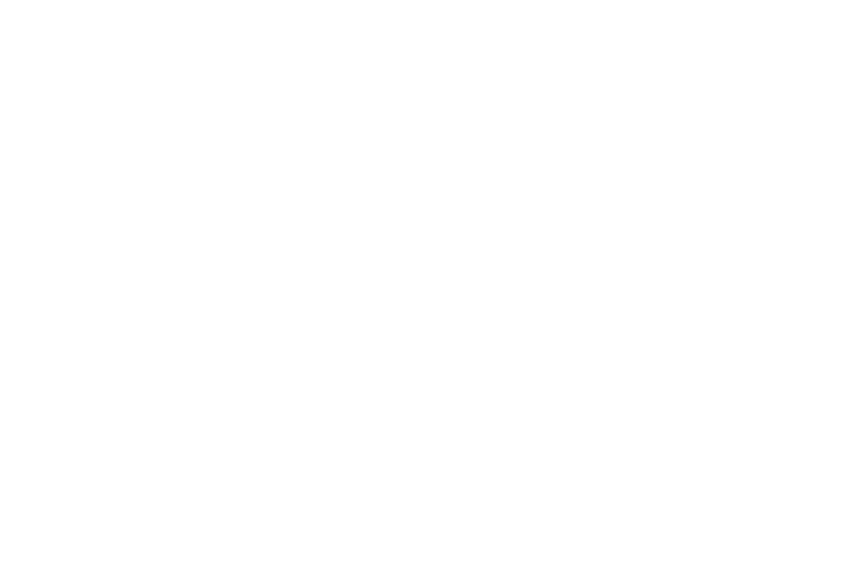

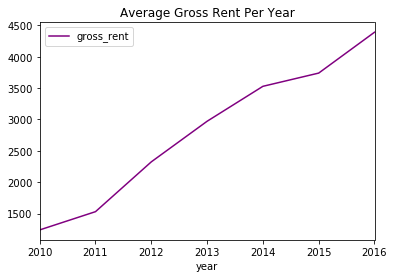

In [303]:
average_gross_rent()

In [315]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    gross_rent = sfo_data["gross_rent"]
    average_gross_rent = average_gross_rent.groupby("year").mean()

    gross_rent_fig = plt.figure()
    gross_rent_plot = avg_gross_rent.plot.line(label = "Average Gross Rent", line_color = "blue")
    
    plt.close(gross_rent_fig)
    
    return pn.pane.Matplotlib(gross_rent_fig)

Matplotlib(Figure)
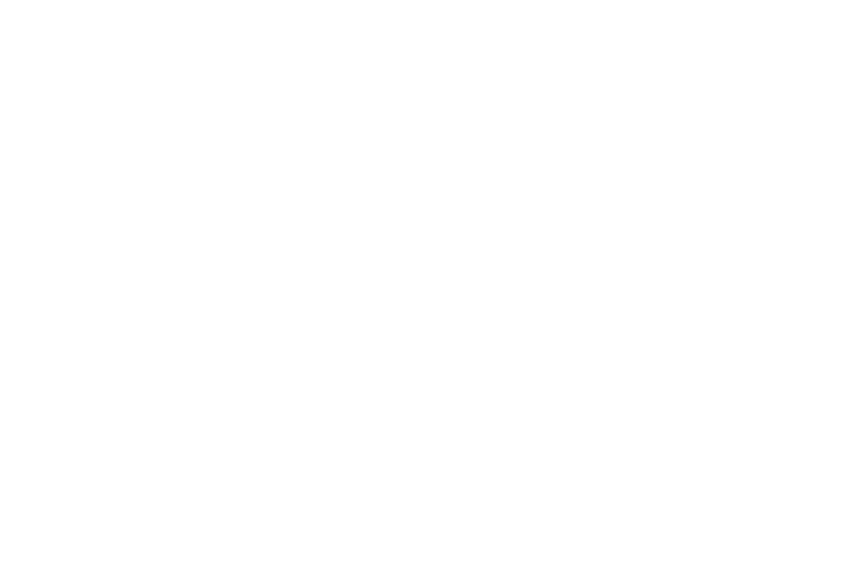

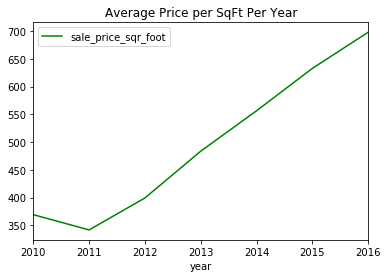

In [316]:
average_sales_price()

In [286]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [287]:
 top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [288]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [296]:
neighborhood_map().show()

ValueError: Shape of passed values is (401, 6), indices imply (77, 6)

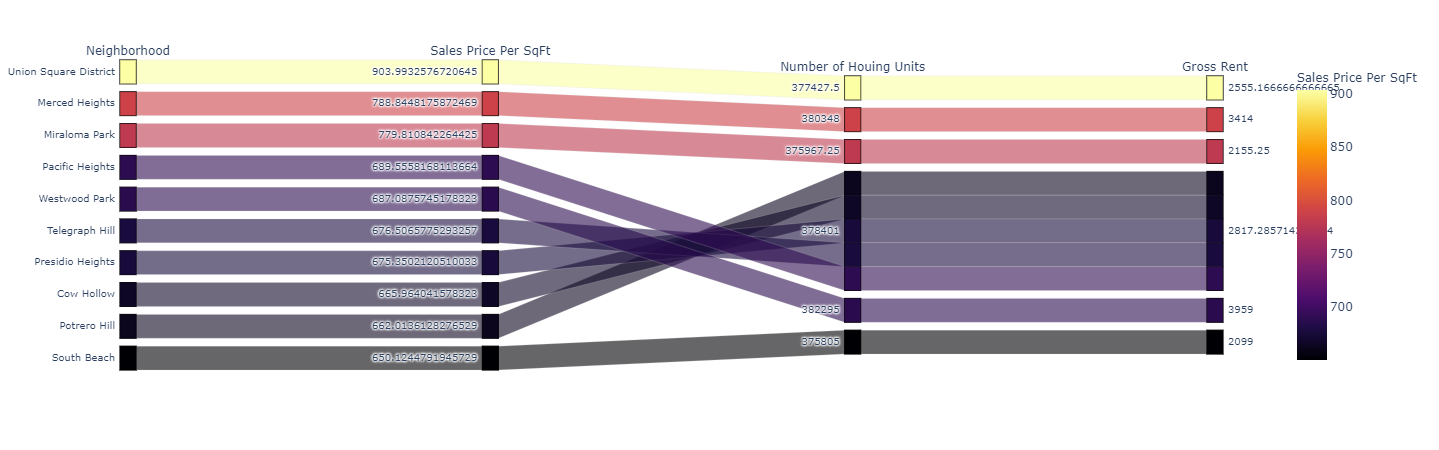

In [304]:
parallel_categories()

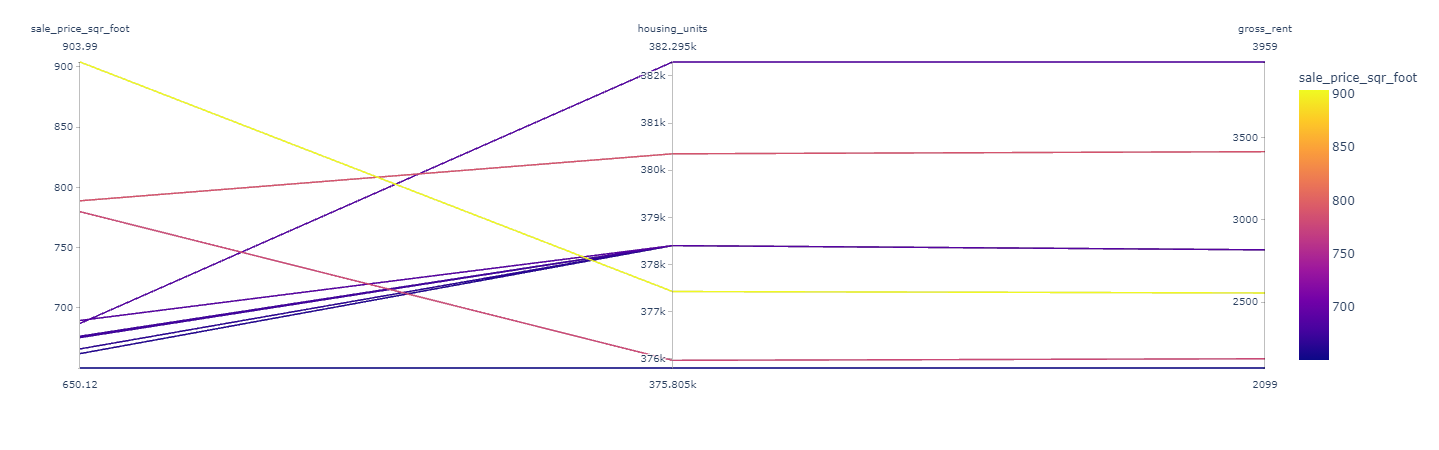

In [305]:
parallel_coordinates()

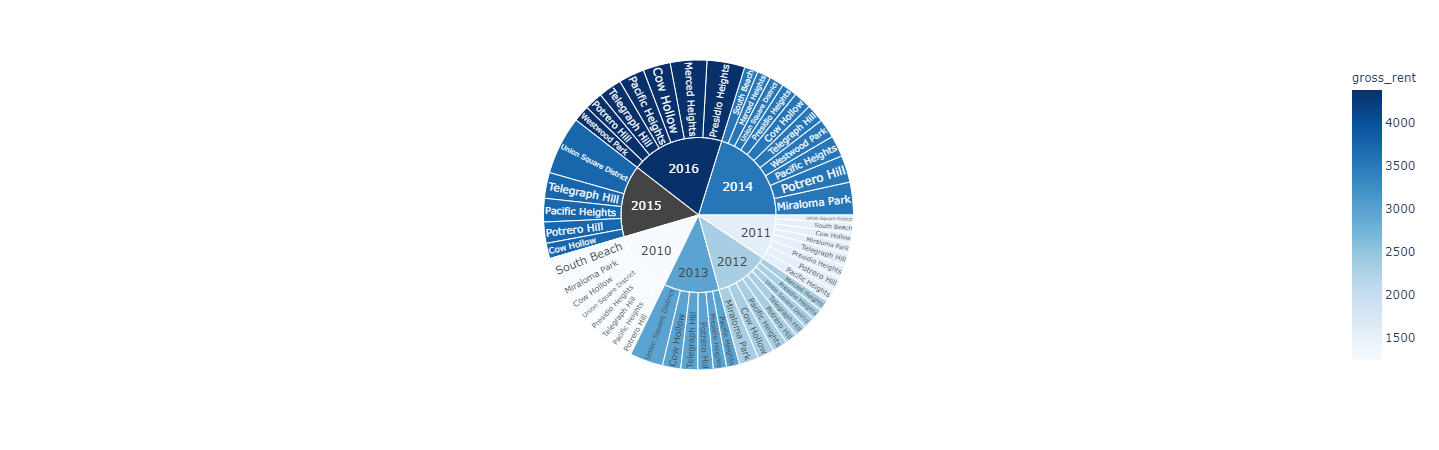

In [306]:
sunburst()

In [307]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_per_year = sfo_data["housing_units"]
    mean_housing_units_per_year = total_housing_units_per_year.groupby("year").mean()
        
    housing_units_fig = plt.figure()
    housing_units_plot = mean_housing_units_per_year.plot.bar(label=" Housing Units per Year", ylim=[370000, 385000])
    
    plt.close(housing_units_fig)
    
    return pn.pane.Matplotlib(housing_unit_fig)
    

Matplotlib(Figure)
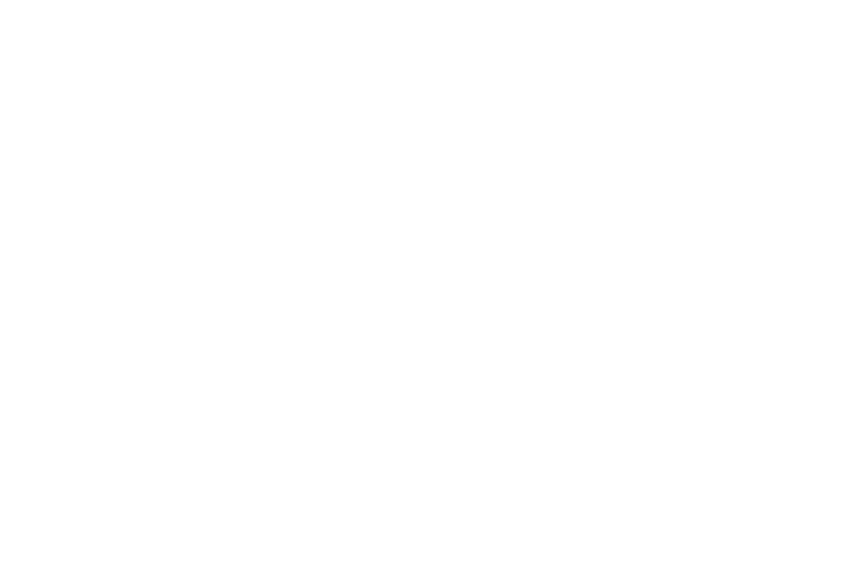

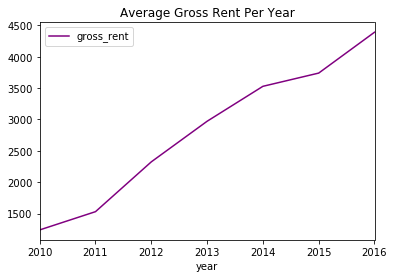

In [308]:
average_gross_rent()

In [321]:
sfo_area_dropdown = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_area_dropdown.reset_index(inplace=True)
sfo_area_dropdown.rename(columns={"level_0": "year"}, inplace=True)

sfo_area_dropdown.hvplot(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Average Sale Price per Square Foot",
    groupby="neighborhood")


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)